In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
directory = "../../data/processed"

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
file_path = os.path.join(directory, f"final_df.csv")
final = pd.read_csv(file_path)

In [5]:
len(final)

773

In [6]:
# Number of clusters
n_clusters = 5  

# Create a KMeans instance with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters,  n_init = 'auto', random_state=42)

# Fit the model
kmeans.fit(final)


KMeans(n_clusters=5, n_init='auto', random_state=42)

In [7]:
# Predict the closest cluster each sample in final_df belongs to
final['cluster'] = kmeans.predict(final)


In [8]:
def recommend_tours(tour_id):
    # Find the cluster of the given tour_id
    cluster = final.loc[tour_id, 'cluster']
    
    # Get other tours in the same cluster
    similar_tours = final[final['cluster'] == cluster].index.tolist()
    
    # Remove the given tour_id from the list
    similar_tours.remove(tour_id)
    
    return similar_tours


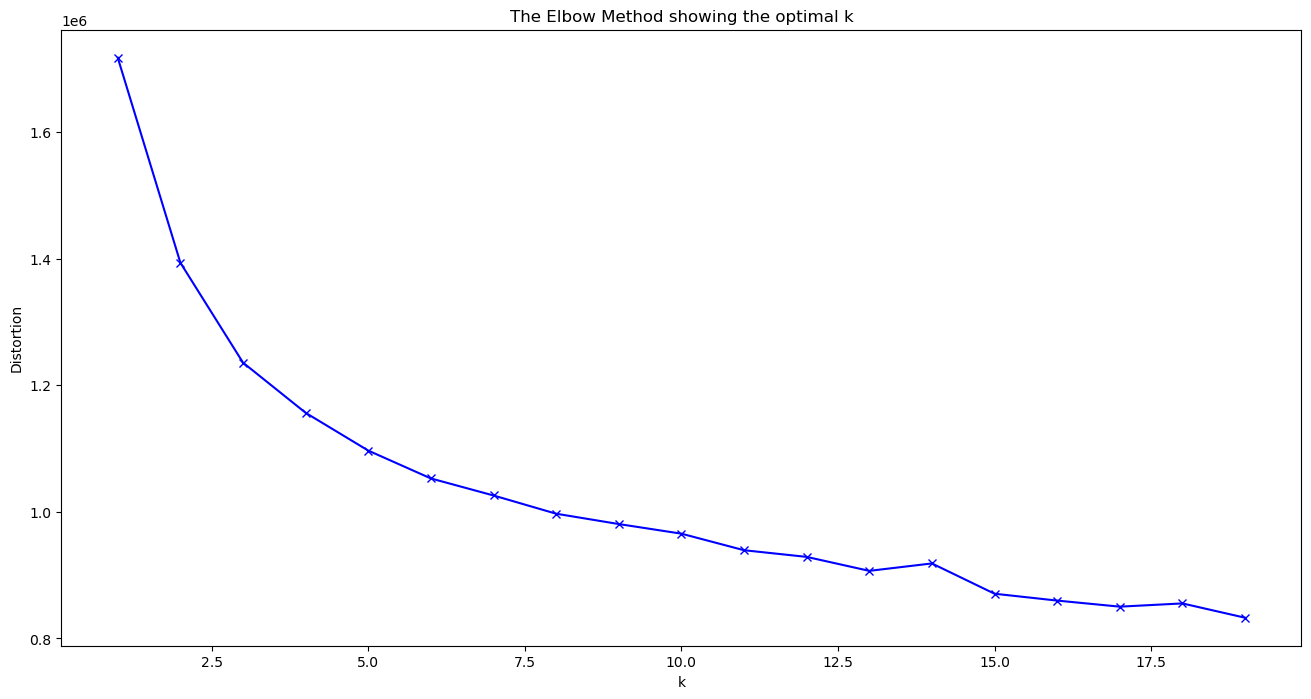

In [9]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init = 'auto')
    kmeanModel.fit(final)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [10]:
recommend_tours(10)

[4,
 9,
 13,
 22,
 31,
 44,
 52,
 53,
 56,
 65,
 77,
 101,
 102,
 109,
 131,
 145,
 164,
 176,
 189,
 190,
 210,
 211,
 226,
 240,
 243,
 247,
 249,
 259,
 261,
 268,
 279,
 295,
 305,
 306,
 320,
 322,
 340,
 342,
 346,
 350,
 353,
 376,
 379,
 381,
 384,
 404,
 414,
 423,
 430,
 434,
 440,
 451,
 465,
 467,
 468,
 469,
 475,
 490,
 494,
 506,
 509,
 518,
 534,
 540,
 544,
 546,
 553,
 556,
 573,
 577,
 579,
 582,
 593,
 594,
 602,
 609,
 614,
 616,
 621,
 626,
 633,
 638,
 656,
 661,
 669,
 688,
 690,
 699,
 708,
 712,
 714,
 725,
 727,
 731,
 736,
 770]

In [11]:
final['cluster'].value_counts()

cluster
2    229
4    185
1    158
3    104
0     97
Name: count, dtype: int64

In [12]:
file_path = '../../data/processed/merged.csv'

In [13]:
original_data = pd.read_csv(file_path)

In [14]:
final['cluster'].to_csv('../../data/processed/clusters.csv')